# `Health Care Stroke Data Analysis`

## `About Dataset`

## `Context`
* 11 clinical features for predicting stroke events.
* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## `Attribute Information`

* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: "NO" if the patient doesn't have hypertension, "Yes" if the patient has hypertension
* 5) heart_disease: "NO" if the patient doesn't have any heart diseases, "Yes" if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: "Yes" if the patient had a stroke or "NO" if not

## `Objectives` 
* 1- Data Understanding 
* 2- Univariate Analysis 
* 3- BiVariate Analysis

### Import Some Helper Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Dark2' , font_scale=1.1 
              , rc = {'figure.figsize' : (10 , 4)})

## `Data Understanding` 

### Read Data Set

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Data OverView 

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NO,YES,Yes,Private,Urban,228.69,"36,6",formerly smoked,YES
1,51676,Female,61.0,NO,NO,Yes,Self-employed,Rural,202.21,NaN,never smoked,YES
2,31112,Male,80.0,NO,YES,Yes,Private,Rural,105.92,"32,5",never smoked,YES
3,60182,Female,49.0,NO,NO,Yes,Private,Urban,171.23,"34,4",smokes,YES
4,1665,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,"24,0",never smoked,YES


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,YES,NO,Yes,Private,Urban,83.75,NaN,never smoked,NO
5106,44873,Female,81.0,NO,NO,Yes,Self-employed,Urban,125.20,"40,0",never smoked,NO
5107,19723,Female,35.0,NO,NO,Yes,Self-employed,Rural,82.99,"30,6",never smoked,NO
5108,37544,Male,51.0,NO,NO,Yes,Private,Rural,166.29,"25,6",formerly smoked,NO
5109,44679,Female,44.0,NO,NO,Yes,Govt_job,Urban,85.28,"26,2",Unknown,NO


### Data Information 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 479.2+ KB


* Data with 5110 entries, 0 to 5109
* Data with 12 columns Feature 
* Data with float64(2), int64(1), object(9) columns 
* bmi column with Missing records about 3 % 
* bmi column with wrong data type string should be float 

### Check Missing  & Duplicated Records 

In [7]:
df.isnull().mean()*100 

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

<AxesSubplot:>

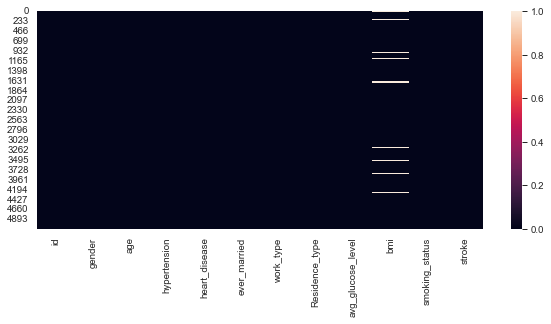

In [8]:
sns.heatmap(df.isnull()) # small ratio of Missing records 

In [9]:
df.drop(['id'] , axis = 1 , inplace = True )

In [10]:
df.duplicated().sum()

0

* Small Ratio of Missing and `No` Duplicated Records 

## `Univariate Analysis (EDA)`

###### gender feature 

In [11]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df[df['gender'] == 'Other'] # one row has other gender convert it Female 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,NO,NO,No,Private,Rural,143.33,"22,4",formerly smoked,NO


In [13]:
df['gender'] = df['gender'].apply(lambda x : 'Female' if x == 'Other' else x )

In [14]:
df['gender'].value_counts().to_frame()

,gender
Female,2995
Male,2115


<AxesSubplot:ylabel='gender'>

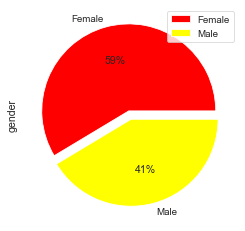

In [15]:
colors = ['red', 'yellow']
explode = (0.05, 0.05)
df['gender'].value_counts().to_frame().plot(kind = 'pie' , y='gender' , autopct='%1.0f%%' ,
                                            colors=colors, explode=explode)

* Female is the majority 

###### Age Feature 

In [16]:
df['age'].describe().to_frame()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [17]:
df[df['age'] < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,NO,NO,No,children,Urban,83.82,"24,9",Unknown,NO
376,Female,0.88,NO,NO,No,children,Rural,88.11,"15,5",Unknown,NO
564,Female,0.32,NO,NO,No,children,Rural,73.71,"16,2",Unknown,NO
982,Male,0.88,NO,NO,No,children,Rural,157.57,"19,2",Unknown,NO
996,Male,0.24,NO,NO,No,children,Rural,118.87,"16,3",Unknown,NO
1093,Female,0.32,NO,NO,No,children,Rural,55.86,"16,0",Unknown,NO
1206,Female,0.72,NO,NO,No,children,Urban,66.36,"23,0",Unknown,NO
1317,Male,0.80,NO,NO,No,children,Rural,98.67,"17,5",Unknown,NO
1600,Male,0.40,NO,NO,No,children,Urban,109.56,"14,3",Unknown,NO
1614,Female,0.08,NO,NO,No,children,Urban,139.67,"14,1",Unknown,NO


<AxesSubplot:xlabel='age'>

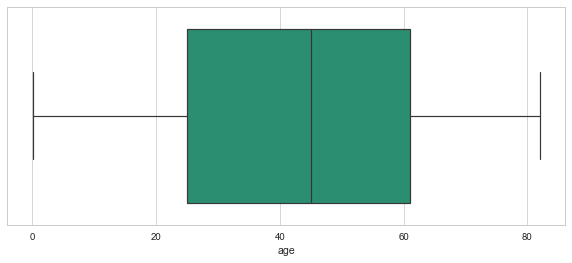

In [18]:
sns.boxplot(df['age'])

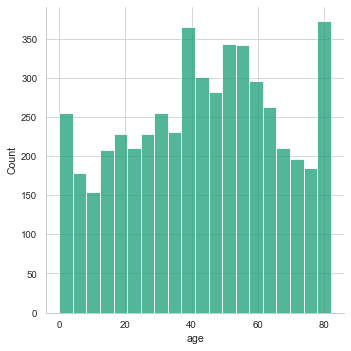

In [19]:
sns.displot(x = df['age'])

* Age with no outliers points and no missing values or wrong values 

###### hypertension feature 

In [20]:
df['hypertension'].unique()

array(['NO', 'YES'], dtype=object)

In [21]:
df['hypertension'].value_counts()

NO     4612
YES     498
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

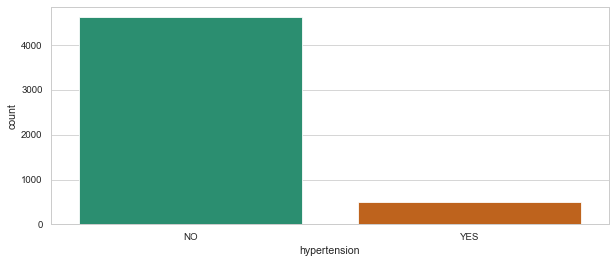

In [22]:
sns.countplot(df['hypertension'])

* NO wrong values has 2 values (YES , NO) , majority of people have no hypertension

###### heart_disease feature 

In [23]:
df['heart_disease'].unique()

array(['YES', 'NO'], dtype=object)

In [24]:
df['heart_disease'].value_counts().to_frame()

,heart_disease
NO,4834
YES,276


<AxesSubplot:ylabel='heart_disease'>

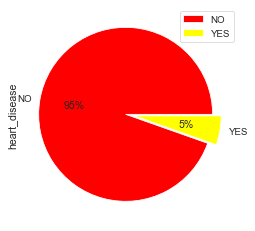

In [25]:
df['heart_disease'].value_counts().to_frame().plot(kind = 'pie' , y='heart_disease' , autopct='%1.0f%%' ,
                                            colors=colors, explode=explode)

* heart_disease feature has no wrong values & most of people have no heart disease 

###### ever_married feature 

In [26]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df['ever_married'].value_counts().to_frame()

,ever_married
Yes,3353
No,1757


<AxesSubplot:xlabel='ever_married', ylabel='count'>

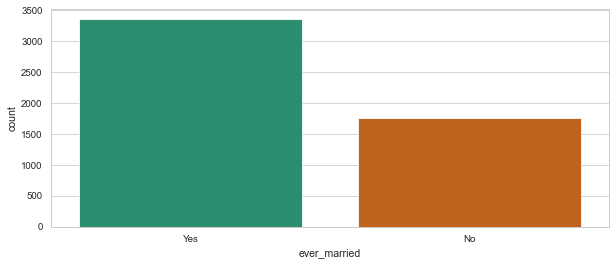

In [28]:
sns.countplot(df['ever_married'])

* ever_married feature has no wrong values and most of people are married 

###### work_type feature 

In [29]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [30]:
df['work_type'].value_counts().to_frame()

,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


* Childern type we can convert it to never_worked 
* children with max age 16 years and never worked with min age 13 and both not working and anthor type of work private  with min age 8 and this is chlidren too 
* soo childern in my opinion is not a type of work & I will convert it to never worked.

In [31]:
df[df['work_type'] == 'children']['age'].describe().to_frame()

,age
count,687.000000
mean,6.841339
std,4.533364
min,0.080000
25%,2.000000
50%,6.000000
75%,11.000000
max,16.000000


In [32]:
df[df['work_type'] == 'Never_worked']['age'].describe().to_frame()

,age
count,22.000000
mean,16.181818
std,2.342899
min,13.000000
25%,14.250000
50%,16.000000
75%,17.000000
max,23.000000


In [33]:
df[df['work_type'] == 'Private']['age'].describe().to_frame()

,age
count,2925.000000
mean,45.503932
std,18.444200
min,8.000000
25%,30.000000
50%,45.000000
75%,59.000000
max,82.000000


In [34]:
df['work_type'] = df['work_type'].apply(lambda x : 'Never_worked' if x == 'children' else x )

<AxesSubplot:xlabel='work_type', ylabel='count'>

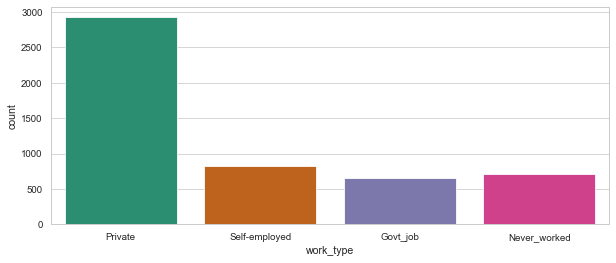

In [35]:
sns.countplot(df['work_type'])

* Most of People have Private work 

###### Residence_type feature 

In [36]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [37]:
df['Residence_type'].value_counts().to_frame()

,Residence_type
Urban,2596
Rural,2514


<AxesSubplot:ylabel='Residence_type'>

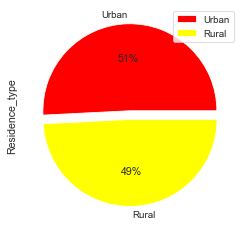

In [38]:
df['Residence_type'].value_counts().to_frame().plot(kind = 'pie' , y='Residence_type' , autopct='%1.0f%%' ,
                                            colors=colors, explode=explode)

* Residence_type has two values with near ratio 

###### avg_glucose_level feature 

In [39]:
df['avg_glucose_level'].describe().to_frame()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


<AxesSubplot:xlabel='avg_glucose_level'>

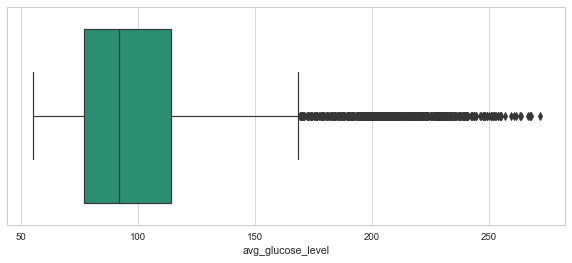

In [40]:
sns.boxplot(df['avg_glucose_level'])

In [41]:
from datasist.structdata import detect_outliers

In [42]:
len(detect_outliers(df , 0 , ['avg_glucose_level']))

627

In [43]:
df.loc[detect_outliers(df , 0 , ['avg_glucose_level'])] # outliers is True values 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NO,YES,Yes,Private,Urban,228.69,"36,6",formerly smoked,YES
1,Female,61.0,NO,NO,Yes,Self-employed,Rural,202.21,NaN,never smoked,YES
3,Female,49.0,NO,NO,Yes,Private,Urban,171.23,"34,4",smokes,YES
4,Female,79.0,YES,NO,Yes,Self-employed,Rural,174.12,"24,0",never smoked,YES
5,Male,81.0,NO,NO,Yes,Private,Urban,186.21,"29,0",formerly smoked,YES
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,NO,NO,Yes,Private,Urban,223.78,"32,3",never smoked,NO
5062,Female,82.0,NO,NO,Yes,Self-employed,Rural,211.58,"36,9",never smoked,NO
5063,Male,39.0,NO,NO,Yes,Private,Urban,179.38,"27,7",Unknown,NO
5064,Male,70.0,NO,NO,Yes,Self-employed,Rural,193.88,"24,3",Unknown,NO


###### In our Model in ML we will binned avg_glucose_level into categories to solve this problem 

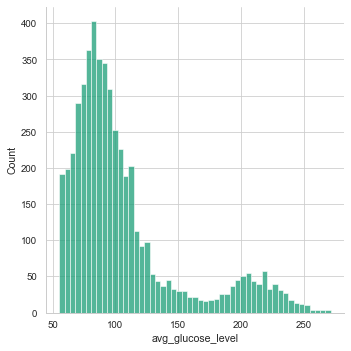

In [44]:
sns.displot(df['avg_glucose_level']) # right skewness 

* has right skewness 

###### bmi feature 

In [45]:
df['bmi'].dtype # object !!

dtype('O')

In [46]:
def correct_bmi(x):
    try:
        return float(x.replace(',' , '.'))
    except :
        return np.nan

In [47]:
df['bmi'] = df['bmi'].apply(correct_bmi)

In [48]:
df['bmi'].isnull().mean()*100

3.9334637964774952

In [49]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [50]:
df[df.select_dtypes('number').columns] = imputer.fit_transform(df[df.select_dtypes('number').columns])

In [51]:
df.isnull().mean()*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [52]:
df['bmi'].describe().to_frame()

,bmi
count,5110.000000
mean,28.949472
std,7.784349
min,10.300000
25%,23.700000
50%,28.200000
75%,33.100000
max,97.600000


<AxesSubplot:xlabel='bmi'>

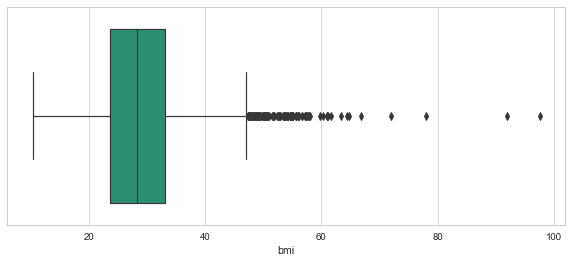

In [53]:
sns.boxplot(df['bmi'])

In [54]:
len(detect_outliers(df , 0 , ['bmi']))

117

In [55]:
df.loc[detect_outliers(df , 0 , ['bmi'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,YES,NO,Yes,Self-employed,Urban,233.29,48.9,never smoked,YES
66,Female,70.0,NO,NO,Yes,Private,Urban,221.58,47.5,never smoked,YES
113,Female,45.0,NO,NO,Yes,Private,Rural,224.10,56.6,never smoked,YES
254,Female,47.0,NO,NO,Yes,Private,Urban,210.95,50.1,Unknown,NO
258,Female,74.0,YES,NO,Yes,Self-employed,Urban,205.84,54.6,never smoked,NO
...,...,...,...,...,...,...,...,...,...,...,...
4858,Female,43.0,NO,NO,Yes,Private,Urban,100.88,47.6,smokes,NO
4906,Female,53.0,NO,NO,Yes,Private,Urban,70.51,54.1,never smoked,NO
4952,Male,51.0,YES,NO,Yes,Self-employed,Rural,211.83,56.6,never smoked,NO
5009,Female,50.0,NO,NO,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,NO


###### In our Model in ML we will binned bmi into categories to solve this problem 

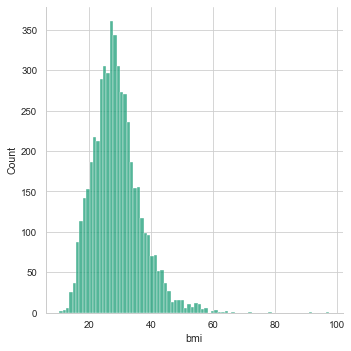

In [56]:
sns.displot(df['bmi'])

###### smoking status feature 

In [57]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [58]:
df['smoking_status'].value_counts().to_frame()

,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

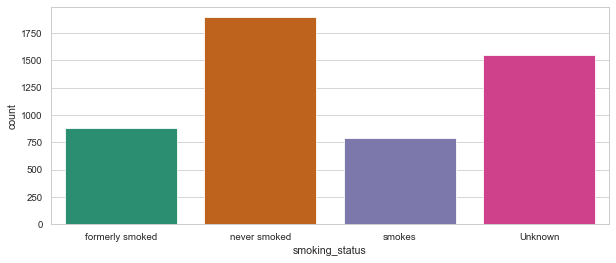

In [59]:
sns.countplot(df['smoking_status'])

* Most of People never smoked 

###### Stroke (Target)

In [60]:
df['stroke'].unique()

array(['YES', 'NO'], dtype=object)

In [61]:
df['stroke'].value_counts().to_frame()

,stroke
NO,4861
YES,249


<AxesSubplot:ylabel='stroke'>

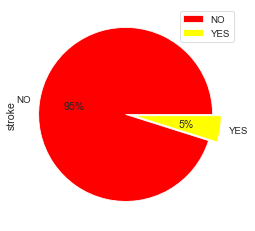

In [62]:
df['stroke'].value_counts().to_frame().plot(kind = 'pie' , y='stroke' , autopct='%1.0f%%' ,
                                            colors=colors, explode=explode)

###### ooopppsss !!! imbalanced label :(

## `Now Time For Bivariate Analysis`

* First we will see effect of all features with Target (Stroke)
* second see all Features with each other and show correlations and so on .. 

In [63]:
df.groupby(['gender'])['stroke'].value_counts(normalize = True ).to_frame()*100

stroke
gender stroke           
Female NO      95.292154
       YES      4.707846
Male   NO      94.893617
       YES      5.106383

<AxesSubplot:xlabel='gender', ylabel='count'>

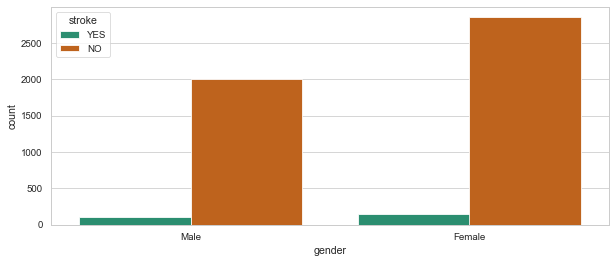

In [64]:
sns.countplot(x = df['gender'] , hue = df['stroke'])

###### stroke feature is not balanced to show any pattern but generally for male & female most of people are not prone to stroke 

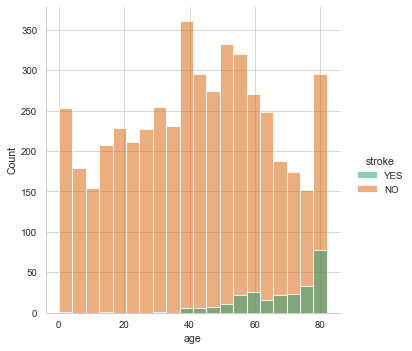

In [65]:
sns.displot(x = df['age'] , hue = df['stroke'])

###### there is clear pattern for people who have age above 40 they are prone to stroke 

In [66]:
df.groupby(['hypertension'])['stroke'].value_counts(normalize = True ).to_frame()*100

stroke
hypertension stroke           
NO           NO      96.032090
             YES      3.967910
YES          NO      86.746988
             YES     13.253012

<AxesSubplot:xlabel='hypertension', ylabel='count'>

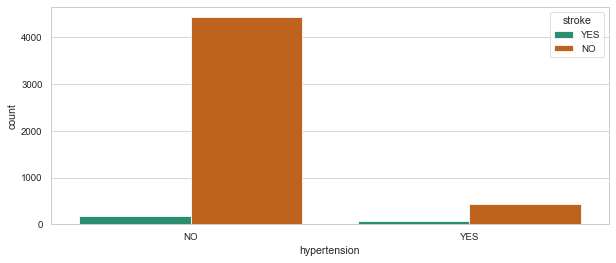

In [67]:
sns.countplot(df['hypertension'] , hue = df['stroke'])

###### for people who has hypertension percentage of stroke is more than people who has not hypertension , and hypertension is imbalanced so 13 % is pretty not small for people who has hypertension

In [68]:
df.groupby(['heart_disease'])['stroke'].value_counts().to_frame()

stroke
heart_disease stroke        
NO            NO        4632
              YES        202
YES           NO         229
              YES         47

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

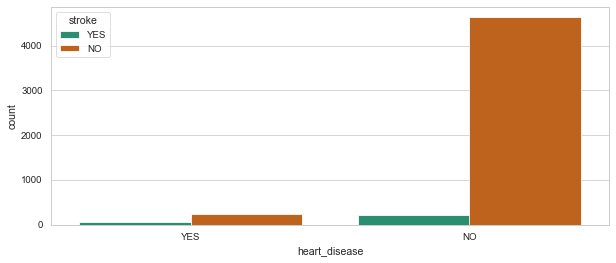

In [69]:
sns.countplot(df['heart_disease'] , hue = df['stroke'])

###### small ratio for people who have heart_disease and small ratio for stroke and it doesn't show any pattern 

In [70]:
df.groupby(['ever_married'])['stroke'].value_counts().to_frame()

stroke
ever_married stroke        
No           NO        1728
             YES         29
Yes          NO        3133
             YES        220

<AxesSubplot:xlabel='ever_married', ylabel='count'>

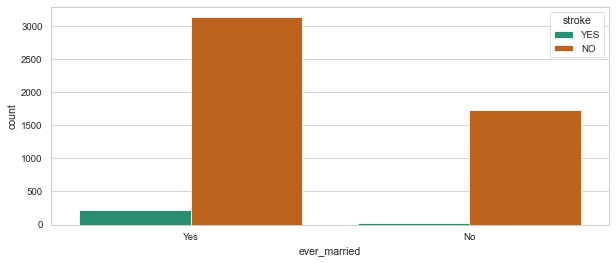

In [71]:
sns.countplot(df['ever_married'] , hue = df['stroke'])

###### by small ration people who have married was prone to stroke

In [72]:
df.groupby(['work_type'])['stroke'].value_counts().to_frame()

stroke
work_type     stroke        
Govt_job      NO         624
              YES         33
Never_worked  NO         707
              YES          2
Private       NO        2776
              YES        149
Self-employed NO         754
              YES         65

<AxesSubplot:xlabel='count', ylabel='work_type'>

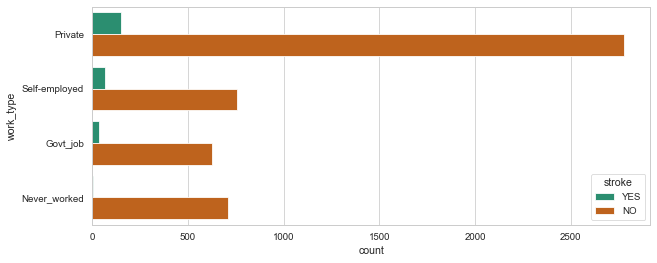

In [73]:
sns.countplot(y = df['work_type'] , hue = df['stroke'])

###### people who work in private works by small ratio are prone to stroke and people who never work are not prone to stroke never 

In [74]:
df.groupby(['Residence_type'])['stroke'].value_counts().to_frame()

stroke
Residence_type stroke        
Rural          NO        2400
               YES        114
Urban          NO        2461
               YES        135

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

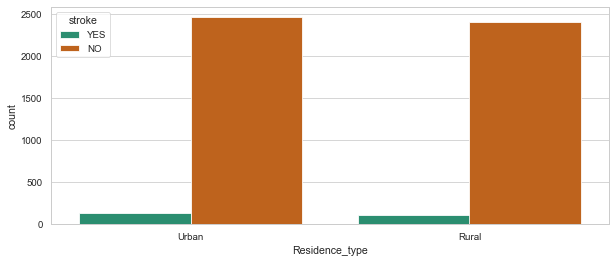

In [75]:
sns.countplot(df['Residence_type'] , hue = df['stroke'])

###### For Residence_type the ratio for both nearly is equal

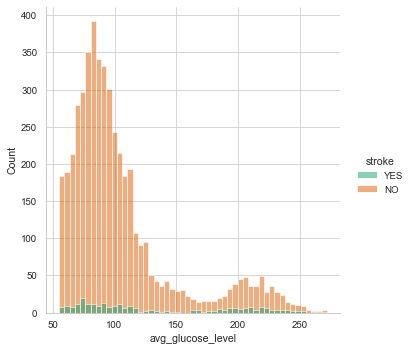

In [76]:
sns.displot(x = df['avg_glucose_level'] , hue = df['stroke'])

###### stroke feature is imbalanced and there is no cleared pattern for avg_glucose_level 

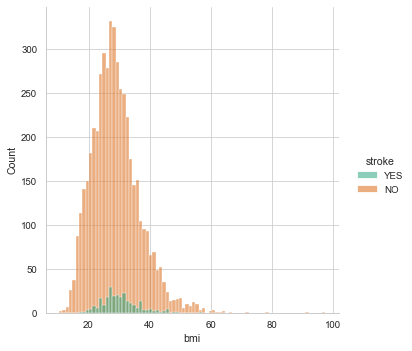

In [77]:
sns.displot(x = df['bmi'] , hue = df['stroke'])

###### stroke feature is imbalanced and there is no cleared pattern for  bmi but we can estimate that stroke is in 20 to 40 bmi 

In [78]:
df.groupby(['smoking_status'])['stroke'].value_counts().to_frame()

stroke
smoking_status  stroke        
Unknown         NO        1497
                YES         47
formerly smoked NO         815
                YES         70
never smoked    NO        1802
                YES         90
smokes          NO         747
                YES         42

<AxesSubplot:xlabel='count', ylabel='smoking_status'>

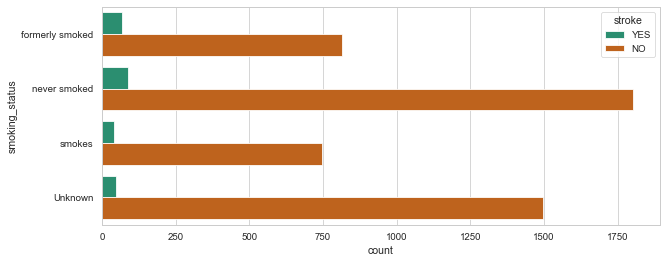

In [79]:
sns.countplot(y = df['smoking_status'] , hue = df['stroke'])

###### data is imbalanced and no cleared pattern 

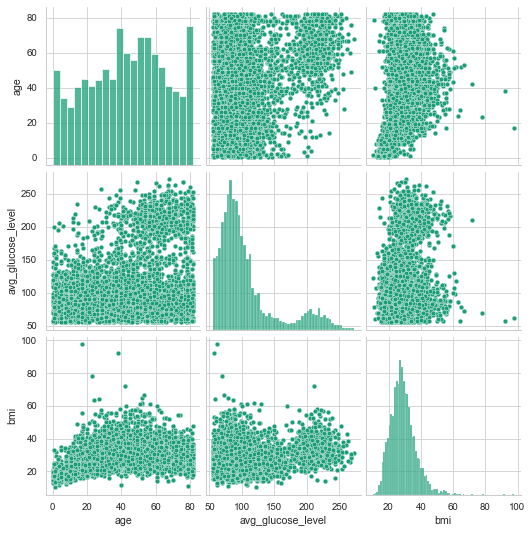

In [80]:
sns.pairplot(df)

* age & bmi there is linear +ve correlation 
* bmi & avg_glucose_level +ve correlation but weak 
* age & avg_glucose_level weak +ve correlation 

<AxesSubplot:>

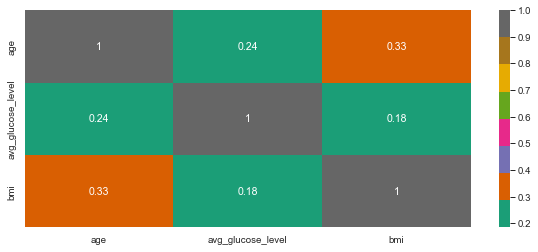

In [81]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True , cmap = 'Dark2')

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

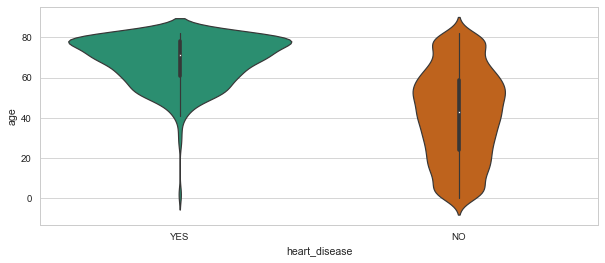

In [178]:
sns.violinplot(x = df['heart_disease'] , y = df['age'])

###### most of people with age above 40 suffer from heart_disease

In [179]:
df.groupby(['work_type'])['bmi'].agg(['mean'])

,mean
work_type,
Govt_job,30.536073
Never_worked,20.206112
Private,30.349333
Self-employed,30.246235


<AxesSubplot:xlabel='work_type', ylabel='bmi'>

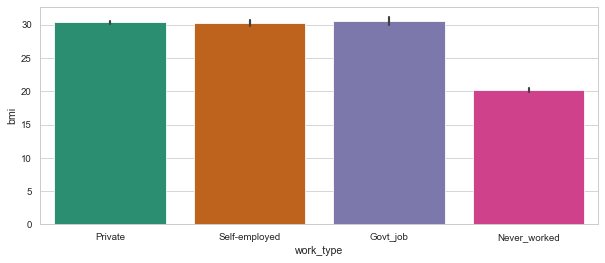

In [180]:
sns.barplot(x = df['work_type'] , y = df['bmi'] , estimator=np.mean)

###### people who never work with small bmi 

In [181]:
df.groupby(['Residence_type'])['heart_disease'].value_counts().to_frame()

heart_disease
Residence_type heart_disease               
Rural          NO                      2380
               YES                      134
Urban          NO                      2454
               YES                      142

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

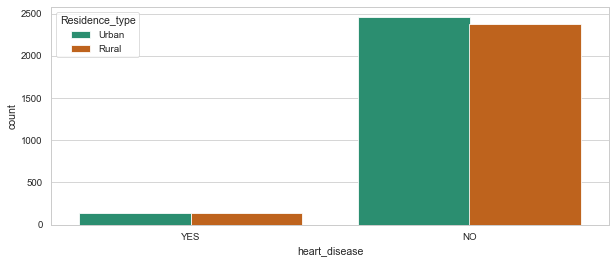

In [182]:
sns.countplot(df['heart_disease'] , hue = df['Residence_type'])

* Nothing noticeable Residence types nearly are equal for both people are have heart disease or not `no effect for Residence_type on  heart_disease`

In [183]:
df.groupby(['heart_disease'])['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
heart_disease,,,,,,,,
NO,4834.0,104.396494,43.432070,55.12,76.9425,91.265,112.5400,267.76
YES,276.0,136.818768,62.823103,56.31,83.4300,106.545,201.8725,271.74


<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

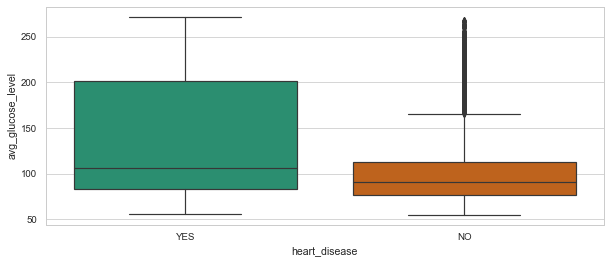

In [184]:
sns.boxplot(x = df['heart_disease'] , y = df['avg_glucose_level'])

###### avg_glucose_level for people who have heart_disease is in 90 to 200 & people who have not heart_disease between 80 to 120

In [185]:
df.groupby(['work_type'])['gender'].value_counts(normalize = True ).to_frame()*100

gender
work_type     gender           
Govt_job      Female  60.730594
              Male    39.269406
Never_worked  Male    52.468265
              Female  47.531735
Private       Female  60.000000
              Male    40.000000
Self-employed Female  61.538462
              Male    38.461538

for every job type of work male and female are nearly equal and no difference between 4 type of jobs

<AxesSubplot:xlabel='work_type', ylabel='count'>

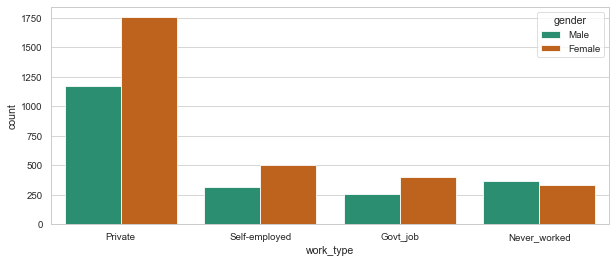

In [186]:
sns.countplot(x = df['work_type'] , hue = df['gender'])

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

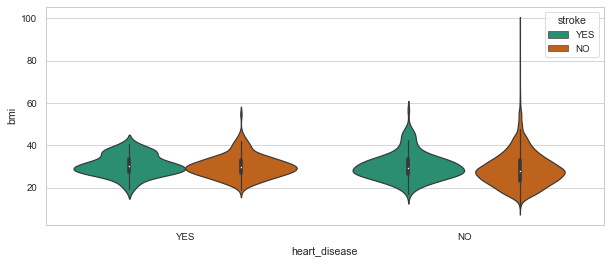

In [187]:
sns.violinplot(x = df['heart_disease'] , y = df['bmi'] , hue = df['stroke'])

###### distribution of people who have heart disease or not and prone to stroke or not are the same 

# `--------------------------Conclusion------------------------------`

###### Convert dtype of bmi from string to float and fill missing recordes by knn imputer 

In [188]:
df['bmi'].dtype

dtype('float64')

In [189]:
df['bmi'].isnull().mean()

0.0

###### wroking type children converted to never worked 

In [190]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

###### outlier points is true data keep it as it later we will convert them to categories (bmi , avg_glucose_level)

In [191]:
#['Underweight', 'Ideal', 'Overweight', 'Obesity']

###### Finally we will save Modified data frame into csv file 

In [192]:
#df.to_csv('Modified-healthcare-dataset-stroke-data.csv' , index=False)